In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [63]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2394,ham,I don't run away frm u... I walk slowly &amp; ...,NaN,NaN,NaN
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...,NaN,NaN,NaN
5316,ham,Jus finish watching tv... U?,NaN,NaN,NaN
2036,ham,You can jot down things you want to remember l...,NaN,NaN,NaN
1964,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN


In [64]:
df.shape

(5572, 5)

In [65]:
df.size


27860

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data Cleaning

In [68]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [69]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [70]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [71]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [72]:
df.sample(5)

,target,text
2035,ham,Simply sitting and watching match in office..
2706,ham,S now only i took tablets . Reaction morning o...
133,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
3143,ham,"Haha I heard that, text me when you're around"
564,ham,"Fuck babe ... I miss you already, you know ? C..."


In [73]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [74]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [75]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [76]:
df = df.drop_duplicates(keep='first')

In [77]:
df.sample(3)

,target,text
2358,ham,I'll talk to the others and probably just come...
4256,spam,important information 4 orange user . today is...
4778,ham,O we cant see if we can join denis and mina? O...


In [78]:
# final dataset format
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [79]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

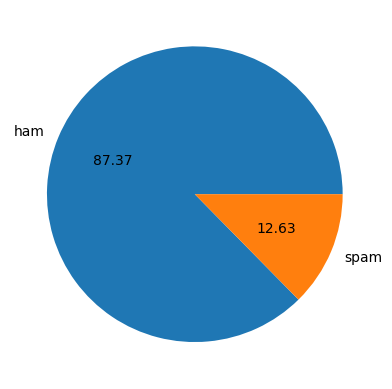

In [81]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [82]:
# Data is unbalanced

In [83]:
import nltk

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [86]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [87]:
# counting the number of alphabets

In [88]:
df['num_characters'] =  df['text'].apply(len)

C:\Users\hario\AppData\Local\Temp\ipykernel_5820\3050218660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] =  df['text'].apply(len)


In [89]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [90]:
# num of words

In [91]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_5820\3620582556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [92]:
df

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35
5568,ham,Will Ì_ b going to esplanade fr home?,37,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [93]:
import nltk

In [94]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [95]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_5820\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [96]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [97]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [98]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_5820\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [100]:
df

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [101]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [103]:
# ham messages
# 0 is denoting the legal or verified messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [104]:
# spam messages
# 1 is denoting the illegal or suspicious messages.
df[df['target']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

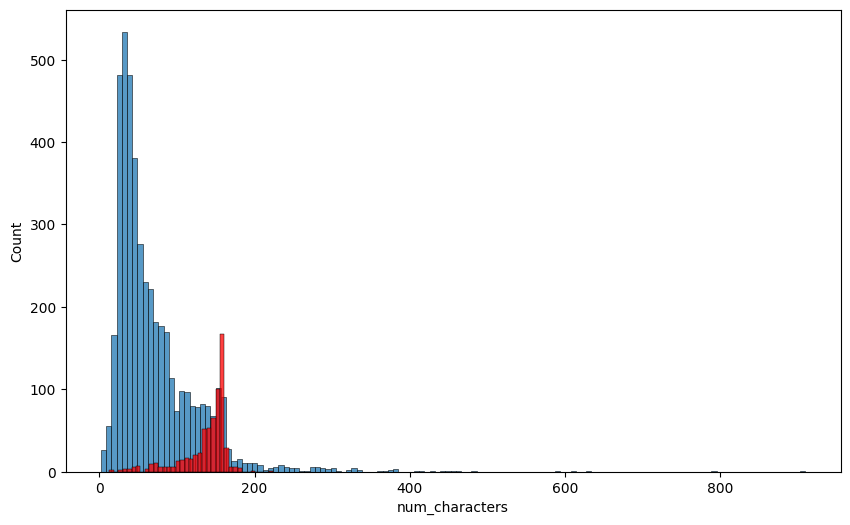

In [106]:
plt.figure(figsize= (10,6))
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'],color='red')

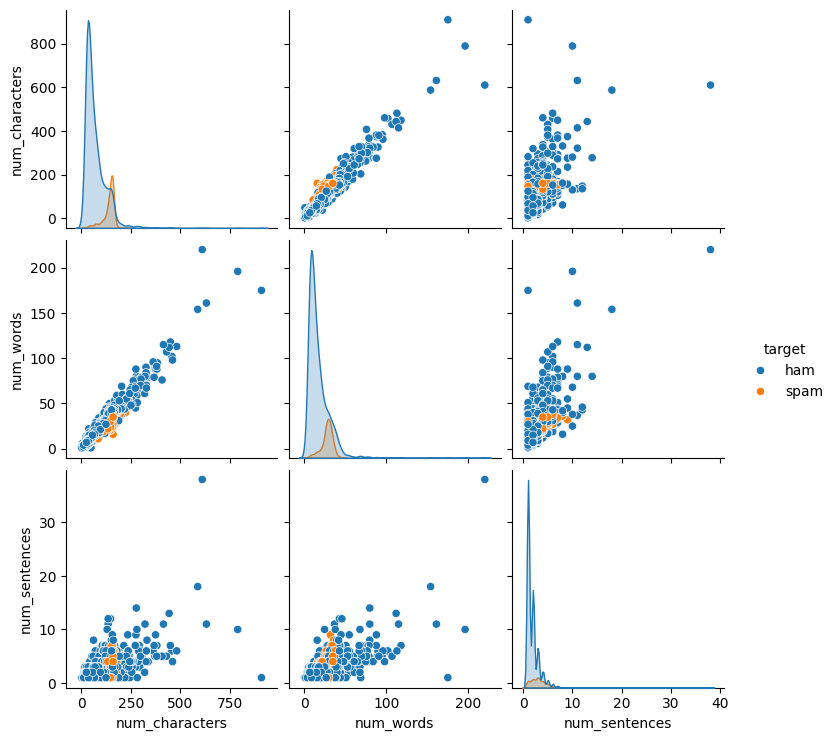

In [107]:
sns.pairplot(df,hue='target')

In [108]:
df_copy = df

In [109]:
type(df['target'])

pandas.core.series.Series

In [110]:
df.sample(40)


,target,text,num_characters,num_words,num_sentences
3633,ham,Its a big difference. &lt;#&gt; versus &lt;...,73,29,2
569,ham,WOT U WANNA DO THEN MISSY?,26,8,1
5093,ham,Gokila is talking with you aha:),32,8,1
1765,ham,Hi this is yijue... It's regarding the 3230 te...,121,27,3
2048,ham,So dont use hook up any how,27,7,1
409,ham,Message:some text missing* Sender:Name Missing...,152,32,1
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,132,29,3
2156,ham,Hey cutie. How goes it? Here in WALES its kind...,114,27,4
4762,ham,Prepare to be pleasured :),26,6,1
4443,ham,COME BACK TO TAMPA FFFFUUUUUUU,30,5,1


<Axes: >

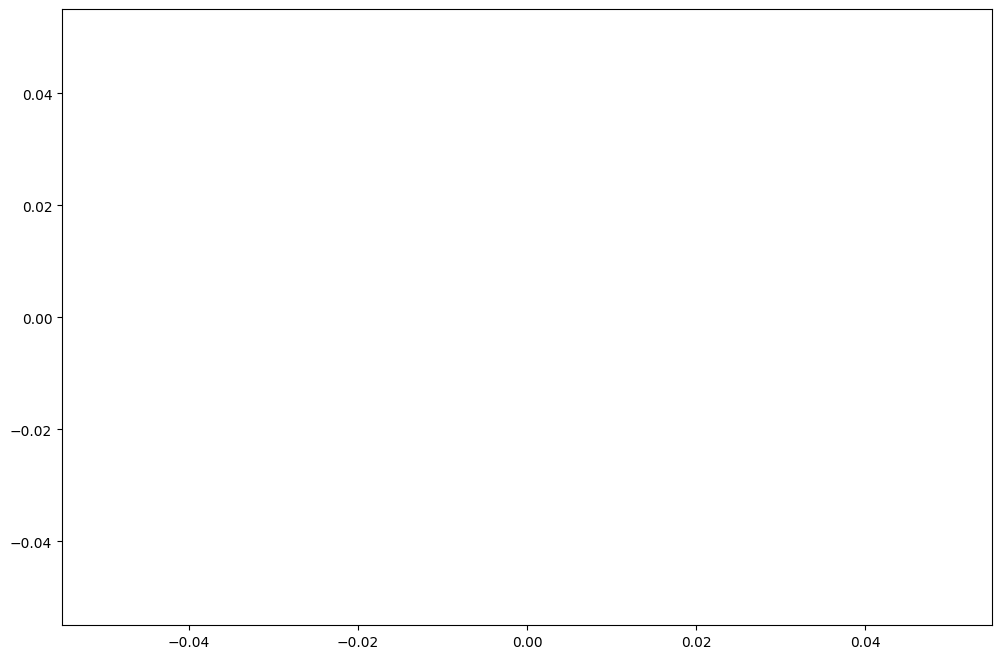

In [111]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'])


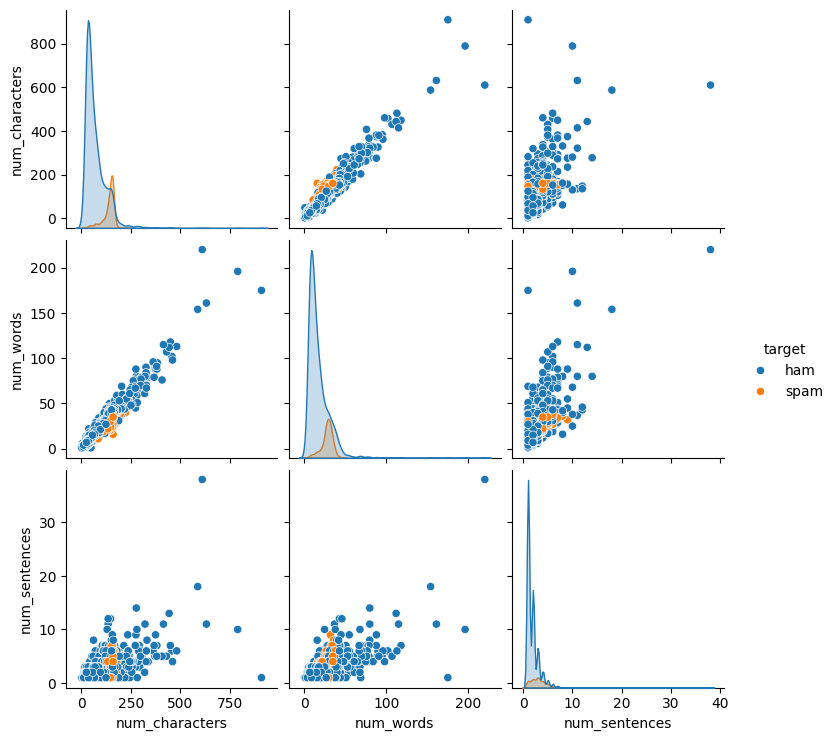

In [112]:
sns.pairplot(df,hue='target')

In [114]:
df.dtypes

target            object
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [115]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

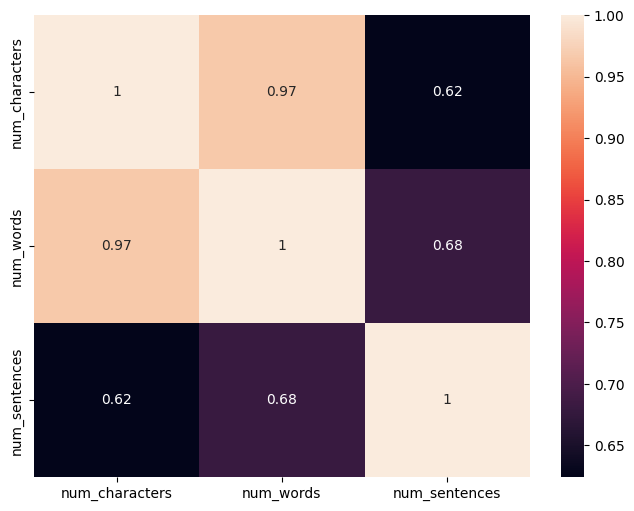

In [116]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

# 3. Data Preprocessing

1. lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [118]:
import nltk

In [119]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [120]:
def transform_text(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenization
    y = []
    # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #cloning
    y.clear()
    
    # removing punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        # stemming of words like playing->play
        y.append(ps.stem(i))

    
    return " ".join(y)

In [123]:
transform_text("hello I am Hariom Singh Thakur and I am 20 years old having $10000 in my @axis bank.")

'hello hariom singh thakur 20 year old 10000 axi bank'

In [ ]:
print(stopwords.words('english'))

In [122]:
import string

In [124]:
print(string.punctuation)
print(ps.stem("playing"))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
play


In [ ]:
transform_text(sample)

In [125]:
sample = df['text'][101]

In [126]:
sample

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [139]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
1209,ham,His bday real is in april .,27,7,1,bday real april
5050,ham,With my sis lor... We juz watched italian job.,46,11,1,si lor juz watch italian job
4566,ham,But you were together so you should be thinkin...,56,11,1,togeth thinkin
5220,ham,I have to take exam with in march 3,35,9,1,take exam march 3
3146,ham,Oh thats late! Well have a good night and i wi...,113,27,3,oh that late well good night give u call tomor...
5217,ham,Well thats nice. Too bad i cant eat it,38,10,2,well that nice bad cant eat
237,ham,Where are you?when wil you reach here?,38,10,1,wil reach
2161,ham,Is she replying. Has boye changed his phone nu...,50,10,2,repli boy chang phone number
1387,ham,Hope ur head doesn't hurt 2 much ! Am ploughin...,139,31,3,hope ur head hurt 2 much plough way pile iron ...
3214,ham,I want snow. It's just freezing and windy.,42,11,2,want snow freez windi


In [128]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\hario\AppData\Local\Temp\ipykernel_5820\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [133]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
4926,ham,Wanna do some art?! :D,22,9,2,wan na art
2803,ham,Lil fever:) now fine:),22,8,1,lil fever fine
75,ham,I am waiting machan. Call me once you free.,43,11,2,wait machan call free
1863,ham,I'll let you know when it kicks in,34,9,1,let know kick
347,ham,One small prestige problem now.,31,6,1,one small prestig problem
5363,ham,"I think your mentor is , but not 100 percent s...",50,12,1,think mentor 100 percent sure
4803,ham,"Er, hello, things didnÛ÷t quite go to plan Û...",114,23,1,er hello thing quit go plan limp slowli home f...
5415,ham,You should get more chicken broth if you want ...,90,19,1,get chicken broth want ramen unless know
308,spam,TheMob> Check out our newest selection of cont...,138,30,1,themob check newest select content game tone g...
5150,ham,Happy new year to u and ur family...may this n...,130,28,1,happi new year u ur famili may new year bring ...


In [140]:
from wordcloud import WordCloud # using wordcloud to display the grop of spam messages in visual format

In [141]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [147]:
df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


C:\Users\hario\AppData\Local\Temp\ipykernel_5820\647980047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})
C:\Users\hario\AppData\Local\Temp\ipykernel_5820\647980047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


In [149]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [152]:
# defining spam wordcloud
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

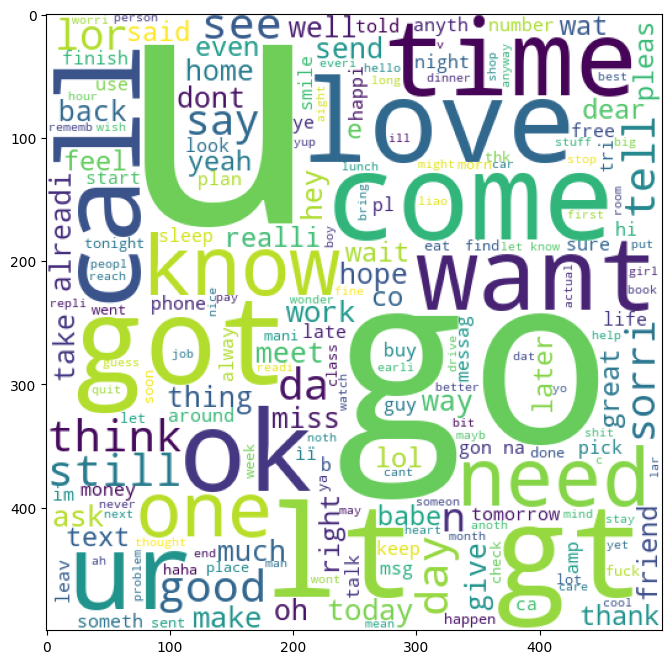

In [153]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)